In [ ]:
! pip install transformers
! pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.2 MB/s 
     |████████████████████████████████| 6.6 MB 44.9 MB/s 
     |████████████████████████████████| 101 kB 13.2 MB/s 
     |████████████████████████████████| 596 kB 65.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 5.1 MB/s 
     |████████████████████████████████| 140 kB 68.6 MB/s 
     |████████████████████████████████| 212 kB 61.6 MB/s 
     |████████████████████████████████| 1.1 MB 62.4 MB/s 
     |████████████████████████████████| 127 kB 71.3 MB/s 
     |████████████████████████████████| 144 kB 71.5 MB/s 
     |████████████████████████████████| 271 kB 69.1 MB/s 
     |███████████

In [ ]:
import tensorflow as tf
import transformers
from transformers import DistilBertTokenizer, TFBertModel, TFDistilBertForMultipleChoice
from transformers import TFDistilBertForSequenceClassification
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TFGPT2ForSequenceClassification, TFRobertaForSequenceClassification

import json

MODEL_NAME = 'microsoft/codebert-base'
#MODEL_NAME = 'huggingface/CodeBERTa-small-v1'
BATCH_SIZE = 10
N_EPOCHS = 3


In [ ]:
task2_x = []
task2_y = []
task2_test_x = []
task2_test_y = []

with open("train_x.txt", 'r') as f:
  for line in f:
    task2_x.append(line)


with open("train_y.txt", 'r') as f:
  for line in f:
    task2_y.append(line)


with open("test_x.txt", 'r') as f:
  for line in f:
    task2_test_x.append(line)


with open("test_y.txt", 'r') as f:
  for line in f:
    task2_test_y.append(line)


print(len(task2_x), len(task2_y),len(task2_test_x),len(task2_test_y))

1816 1816 202 202


In [ ]:
#tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


#model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)



# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=15, batch_size=BATCH_SIZE)



All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/15
227/227 [==============================] - 241s 999ms/step - loss: 0.7514 - accuracy: 0.7093
Epoch 2/15
227/227 [==============================] - 227s 999ms/step - loss: 0.6889 - accuracy: 0.7340
Epoch 3/15
227/227 [==============================] - 227s 998ms/step - loss: 0.6785 - accuracy: 0.7307
Epoch 4/15
227/227 [==============================] - 227s 999ms/step - loss: 0.6627 - accuracy: 0.7296
Epoch 5/15
227/227 [==============================] - 227s 999ms/step - loss: 0.6424 - accuracy: 0.7406
Epoch 6/15
227/227 [==============================] - 227s 999ms/step - loss: 0.6196 - accuracy: 0.7373
Epoch 7/15
227/227 [==============================] - 227s 999ms/step - loss: 0.6132 - accuracy: 0.7445
Epoch 8/15
227/227 [==============================] - 227s 999ms/step - loss: 0.5874 - accuracy: 0.7572
Epoch 9/15
227/227 [==============================] - 227s 999ms/step - loss: 0.5725 - accuracy: 0.7561
Epoch 10/15
227/227 [==============================] - 227s 998m

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

              precision    recall  f1-score   support

           0       0.65      0.47      0.55        51
           1       0.81      0.85      0.83       133
           2       0.23      0.33      0.27        18

    accuracy                           0.71       202
   macro avg       0.56      0.55      0.55       202
weighted avg       0.72      0.71      0.71       202



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

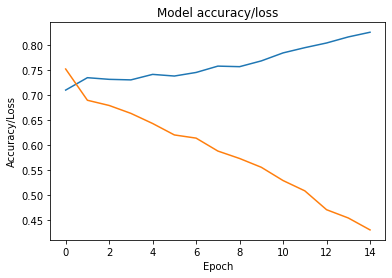

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
print(test_dataset2)

In [ ]:
# 5 epochs

In [ ]:
#tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


#model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)



# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=5, batch_size=BATCH_SIZE)


All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
182/182 [==============================] - 266s 1s/step - loss: 0.7468 - accuracy: 0.7115
Epoch 2/5
182/182 [==============================] - 219s 1s/step - loss: 0.6752 - accuracy: 0.7351
Epoch 3/5
182/182 [==============================] - 219s 1s/step - loss: 0.6306 - accuracy: 0.7434
Epoch 4/5
182/182 [==============================] - 219s 1s/step - loss: 0.6148 - accuracy: 0.7522
Epoch 5/5
182/182 [==============================] - 219s 1s/step - loss: 0.6010 - accuracy: 0.7528


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

              precision    recall  f1-score   support

           0       0.92      0.30      0.45        37
           1       0.76      0.98      0.85       139
           2       0.50      0.19      0.28        26

    accuracy                           0.75       202
   macro avg       0.72      0.49      0.53       202
weighted avg       0.75      0.75      0.70       202



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

0.7524752475247525


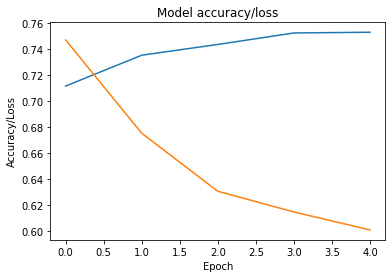

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
# 10 epochs

In [ ]:
#tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


#model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)



# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=10, batch_size=10)


All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10


ResourceExhaustedError: ignored

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.69      0.82       202
           2       0.00      0.00      0.00         0

    accuracy                           0.69       202
   macro avg       0.33      0.23      0.27       202
weighted avg       1.00      0.69      0.82       202



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

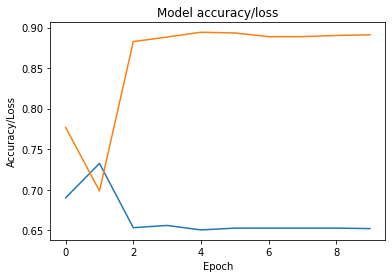

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
# 20 epochs

In [ ]:
#tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
#model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)



# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=20, batch_size=BATCH_SIZE)


All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/20
114/114 [==============================] - 120s 987ms/step - loss: 0.7520 - accuracy: 0.7109
Epoch 2/20
114/114 [==============================] - 112s 984ms/step - loss: 0.6834 - accuracy: 0.7291
Epoch 3/20
114/114 [==============================] - 113s 988ms/step - loss: 0.6347 - accuracy: 0.7412
Epoch 4/20
114/114 [==============================] - 112s 985ms/step - loss: 0.6066 - accuracy: 0.7445
Epoch 5/20
114/114 [==============================] - 112s 985ms/step - loss: 0.5185 - accuracy: 0.7924
Epoch 6/20
114/114 [==============================] - 113s 988ms/step - loss: 0.4518 - accuracy: 0.8106
Epoch 7/20
114/114 [==============================] - 112s 985ms/step - loss: 0.3937 - accuracy: 0.8199
Epoch 8/20
114/114 [==============================] - 112s 984ms/step - loss: 0.2890 - accuracy: 0.8827
Epoch 9/20
114/114 [==============================] - 112s 984ms/step - loss: 0.2277 - accuracy: 0.9108
Epoch 10/20
114/114 [==============================] - 113s 988m

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

              precision    recall  f1-score   support

           0       0.54      0.57      0.56        35
           1       0.80      0.83      0.81       134
           2       0.42      0.33      0.37        33

    accuracy                           0.70       202
   macro avg       0.59      0.58      0.58       202
weighted avg       0.69      0.70      0.70       202



In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

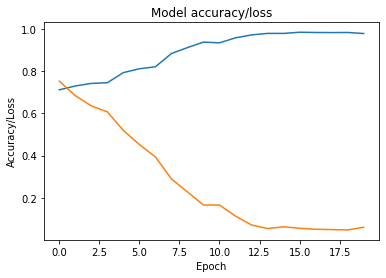

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [ ]:
# 25 epochs

In [ ]:
#tokenizer2 = DistilBertTokenizer.from_pretrained(MODEL_NAME)
tokenizer2 = AutoTokenizer.from_pretrained(MODEL_NAME)
# if tokenizer2.pad_token is None:
#     tokenizer2.add_special_tokens({'pad_token': '[PAD]'})


#tokenize the text
train_encodings2 = tokenizer2(list(task2_x),
                            truncation=True, 
                            padding=True)
test_encodings2 = tokenizer2(list(task2_test_x),
                           truncation=True, 
                           padding=True)



task2_y_str = []
task2_test_y_str = []

for a in task2_y:
  task2_y_str.append(int(a))

for a in task2_test_y:
  task2_test_y_str.append(int(a))


train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings2),
                                    list(task2_y_str)))
test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings2),
                                    list(task2_test_y_str)))


model2 = TFDistilBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3)
#model2 = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3,from_pt=True)



# model2 = TFGPT2ForSequenceClassification.from_pretrained("gpt2", num_labels=3)

#chose the optimizer
optimizerr2 = tf.keras.optimizers.Adam(learning_rate=5e-5)
#define the loss function 
losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#build the model



model2.compile(optimizer=optimizerr2,
              loss=losss2,
              metrics=['accuracy'])


# train the model 
history = model2.fit(train_dataset2.shuffle(len(task2_x)).batch(BATCH_SIZE),epochs=25, batch_size=BATCH_SIZE)


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

predictions1_tran = []
predictions2_tran = []

test = model2.predict(test_dataset2.batch(1)).logits
for a in test:
  # print(a)
  # print(tf.nn.softmax(a, axis=0))
  # print(tf.nn.softmax(a, axis=0).numpy())
  # print(np.argmax(tf.nn.softmax(a, axis=0).numpy()))
  # print(a)

  predictions2_tran.append(int(np.argmax(tf.nn.softmax(a, axis=0).numpy())))

In [ ]:
print(classification_report(task2_test_y_str, predictions2_tran))

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(task2_test_y_str, predictions2_tran))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()